<a href="https://colab.research.google.com/github/DhruvilPanchal205/Machine_Learning_Models/blob/main/Electrtic_Vehicle_Population%20in%20US%20using%20K-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [ ]:
#Load Datasets
df = pd.read_csv('/Electric_Vehicle_Population_Data.csv')
X = df[['Model Year', 'Electric Range']]

In [ ]:
#Compute WCSS
wcss = []
k_values = range(1, 11)
for k in k_values:
    k_means = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

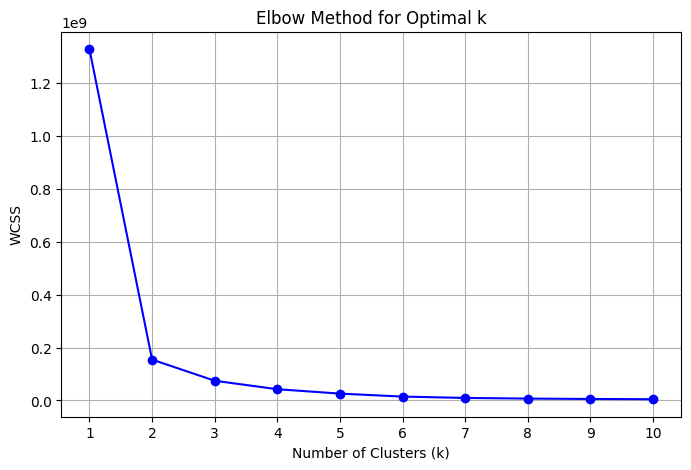

In [ ]:
#elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
#applying KMeans
optimal_k = 3
k_means = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
Y = k_means.fit_predict(X)

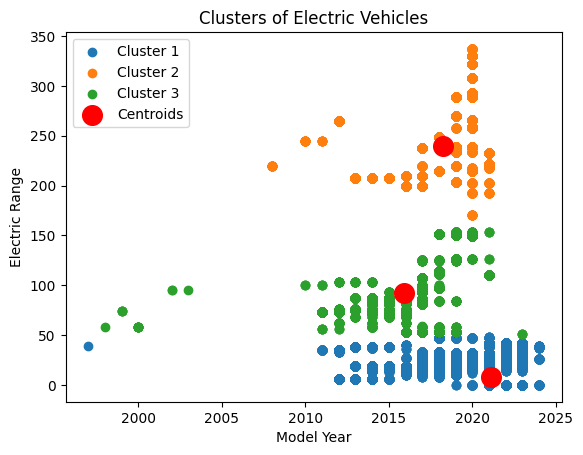

In [ ]:
#visulizing clusters
for i in range(optimal_k):
    cluster_data = X[Y == i]
    plt.scatter(cluster_data['Model Year'], cluster_data['Electric Range'], label=f'Cluster {i+1}')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('Clusters of Electric Vehicles')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.legend()
plt.show()